In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
pd_data=pd.read_csv('Reviews.csv')
pd_data=pd_data[:10000]

# 1. Top-10 Reviewer

In [3]:
pd_data1=pd_data.groupby(['UserId', 'ProfileName'])
pd_data2=pd_data1['UserId'].agg({'Score count':'count'})
pd_data3=pd_data1['Score'].agg({'Score mean':'mean'})
pd_data4=pd.concat([pd_data2, pd_data3], axis=1).sort_values('Score count', ascending=False)
pd_data4.sort_values('Score count', ascending=False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667
AY12DBB0U420B,Gary Peterson,6,4.500000


# 2. Plot score distribution for the user with the most number of reviews

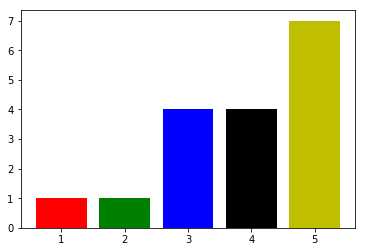

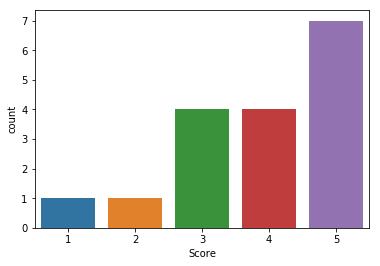

In [4]:
S=pd_data.loc[pd_data.UserId==pd_data4.index[0][0], 'Score'].value_counts().sort_values(ascending=True)
plt.bar(range(1, 6), S, color='rgbky')
plt.show()
sns.countplot(x=pd_data.loc[pd_data.UserId==pd_data4.index[0][0], 'Score'], data=pd_data.loc[pd_data.UserId==pd_data4.index[0][0], 'Score'])

# 3. Plot pandas Series DataFrame (Time->Date)

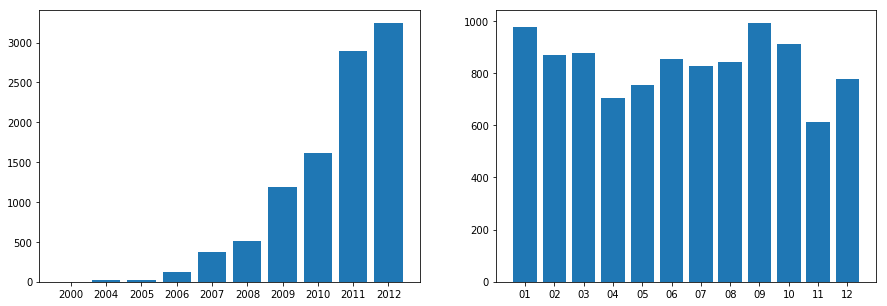

In [15]:
year=[]
month=[]

Time=pd_data.loc[:, 'Time']
for i in Time:
    year.append(time.strftime("%Y", time.localtime(i)))
    month.append(time.strftime("%m", time.localtime(i)))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(np.unique(year, return_counts=True)[0], np.unique(year, return_counts=True)[1])
plt.subplot(1, 2, 2)
plt.bar(np.unique(month, return_counts=True)[0], np.unique(month, return_counts=True)[1])
plt.show()

# 4. Plot HeatMap using seaborn

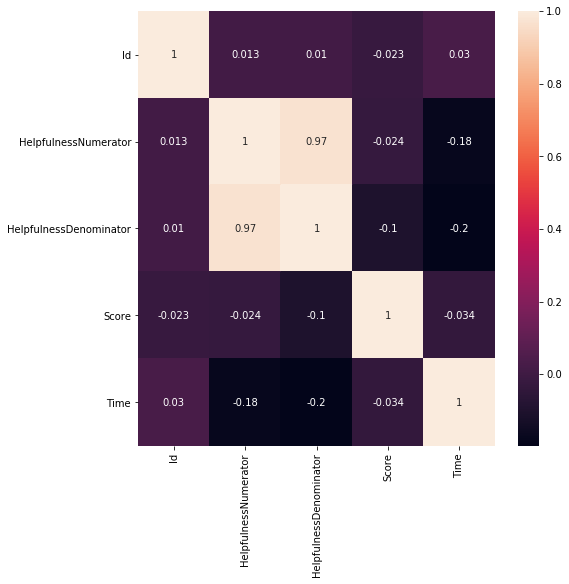

In [6]:
pd_data5=pd_data.drop(['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text'], axis=1)

plt.figure(figsize=(8, 8))
sns.heatmap(pd_data5.corr(), annot=True)

# 5. Helpful percent

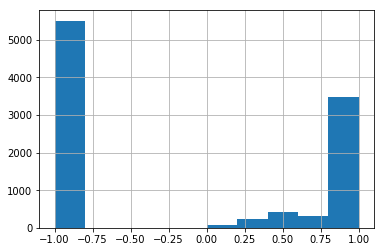

In [7]:
numerator=[]
denominator=[]
percent=[]

for i in pd_data.loc[:, 'HelpfulnessNumerator']:
    numerator.append(i)
for i in pd_data.loc[:, 'HelpfulnessDenominator']:
    denominator.append(i)
for i in range(0,len(numerator)):
    if numerator[i]==0& denominator[i]==0:
        percent.append(-1)
    else:
        percent.append(numerator[i]/denominator[i])
        
plt.hist(percent)
plt.grid()
plt.show()

In [8]:
type(pd_data.loc[pd_data.UserId==pd_data4.index[0][0], 'Score'].value_counts().sort_values(ascending=True))

pandas.core.series.Series